In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel("data/fire_theft.xls")
data

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53
5,34.1,68
6,11.0,75
7,6.9,18
8,7.3,31
9,15.1,25


In [3]:
X = tf.placeholder(shape=[None,1],name="X",dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],name="Y",dtype=tf.float32)
weight = tf.Variable(initial_value=0.0 ,name="weight")
bias = tf.Variable(initial_value=0.0,name="hias")
model = X * weight + bias
loss = tf.reduce_mean(tf.square(Y - model,name="loss"))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


In [4]:
sess = tf.Session()

In [5]:
train_features  = data["X"].values.reshape([len(data),1])
train_label     = data["Y"].values.reshape([len(data),1])
train_feed_dict = {X:train_features,Y:train_label}

In [6]:
writer = tf.summary.FileWriter('./my_graph/03/linear_reg',sess.graph)
with sess.as_default() as sess:
    tf.global_variables_initializer().run()
    for i in range(100):
        sess.run([optimizer],feed_dict=train_feed_dict)
        
    print(sess.run(loss,feed_dict=train_feed_dict))

450.062


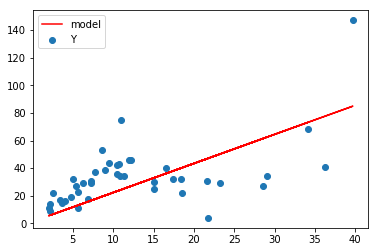

In [25]:
data["model"] = sess.run(model,feed_dict={X:train_features})
plt.scatter(x=data["X"],y=data["Y"],label="Y")
plt.plot(data["X"],data["model"],"r",label="model")
plt.legend()
plt.show()
